In [1]:
# loading the IMDB dataset

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
import numpy as np


def vectorize_sequences(sequences, demension=10000):
    results = np.zeros((len(sequences), demension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
# vectorize labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers
from keras import regularizers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

modelr = models.Sequential()
modelr.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
modelr.add(layers.Dense(16, activation='relu'))
modelr.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
modelr.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
historyr = modelr.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5083 - accuracy: 0.7850 - val_loss: 0.3930 - val_accuracy: 0.8581
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3048 - accuracy: 0.8999 - val_loss: 0.3028 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2246 - accuracy: 0.9259 - val_loss: 0.2816 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1734 - accuracy: 0.9447 - val_loss: 0.2762 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1417 - accuracy: 0.9550 - val_loss: 0.3094 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1190 - accuracy: 0.9621 - val_loss: 0.2951 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0974 - accuracy: 0.9701 - val_loss: 0.3114 - val_accuracy: 0.8822
Epoch 8/20
30

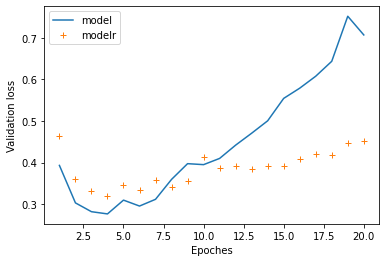

In [10]:
import matplotlib.pyplot as plt


val_loss_values = history.history['val_loss']
epoches = range(1, len(val_loss_values) + 1)
plt.plot(epoches, val_loss_values, '-', label='model')

val_loss_values = historyr.history['val_loss']
epoches = range(1, len(val_loss_values) + 1)
plt.plot(epoches, val_loss_values, '+', label='modelr')

plt.xlabel('Epoches')
plt.ylabel('Validation loss')
plt.legend()
plt.show()